In [ ]:
pip install pandas numpy scikit-learn seaborn matplotlib


Dataset loaded successfully.
Dataset Head:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     50

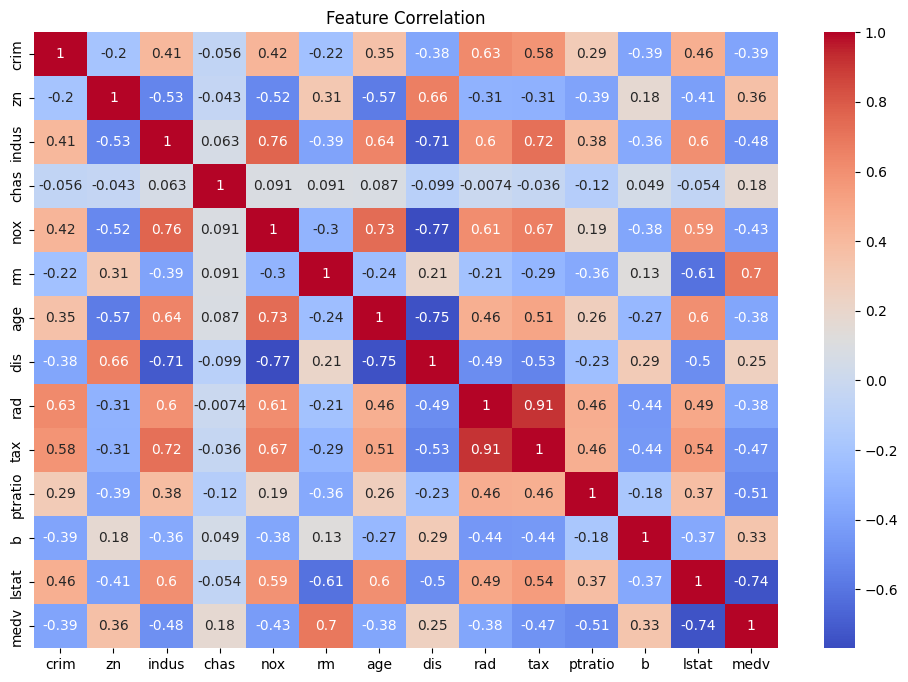


Linear Regression Performance:
RMSE: 4.928602182665336
R2 Score: 0.668759493535632

Random Forest Performance:
RMSE: 2.8155186615139556
R2 Score: 0.891903226702447


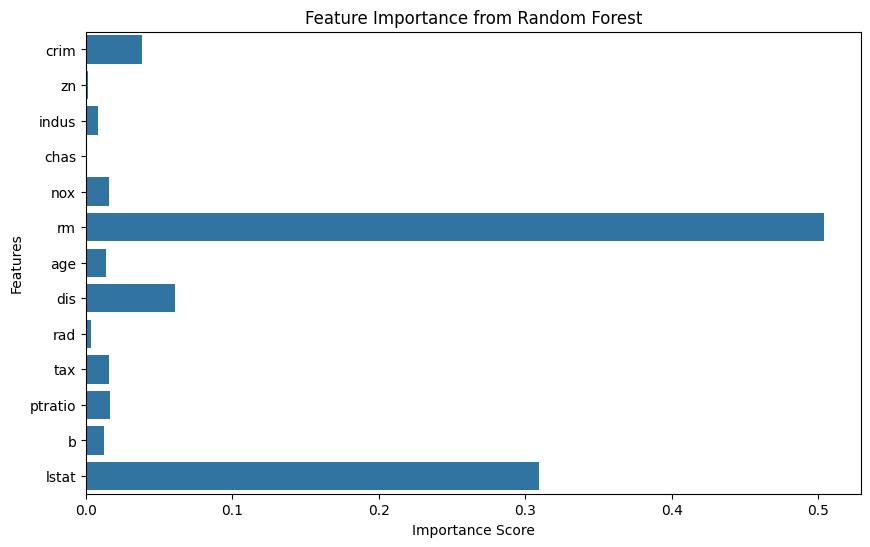

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Correct the dataset URL or use a local file if the URL is unavailable
# Update the URL or replace with a local path to the Boston housing dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'

# Load the dataset
try:
    data = pd.read_csv(url)
    print("Dataset loaded successfully.")
except Exception as e:
    print("Error loading dataset:", e)
    # Provide a fallback option for local dataset
    print("Ensure you provide the correct URL or local dataset file path.")
    raise

# Inspect the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Data Preprocessing
# Handle missing values (if any)
if data.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    data.fillna(data.mean(), inplace=True)

# Check correlation heatmap to understand feature relationships
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Define features (X) and target (y)
target = 'medv'  # Replace 'medv' with the actual target column name if it's different
X = data.drop(columns=[target])
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Evaluation: Linear Regression
y_pred_lr = lr_model.predict(X_test)
print("\nLinear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# Model Training: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation: Random Forest
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Predict on new data (if available)
# Example: new_data = pd.DataFrame({'feature1': [value1], 'feature2': [value2], ...})
# scaled_new_data = scaler.transform(new_data)
# predictions = rf_model.predict(scaled_new_data)
